<center>$\huge{\textbf{AI using Python}}$</center>
<center>$\hspace{.1cm}$</center>
<center>$\Large{\textbf{16. Autoencoder}}$</center>

---

<center>

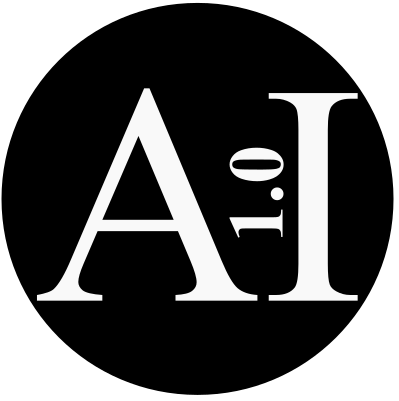

</center>

$\large{\textbf{16.1 Autoencoder}}$

* $\color{red}{\textbf{Autoencoder (AE)}}$ is a nonlinear dimensionality reduction method.

*   Training data contains

   *  $\color{red}{\textbf{Inputs}}$ (Unlabeled data): consists of $N$ observations $\{ x_{1}, x_{2},...,x_{N} \}$
   where $x_{k} \in \mathbb{R}^n,$ $k=1,..,N$ are the $N$ samples which are assumed to be mean-centered.
* Each sample $x$ consists of measurements of $n$ variables.

* Autoencoder is a deep neural network consisting of two subnetworks:
 * $\color{red}{\textbf{Encoder}}$: which transforms its input vector (unlabeled data) into a latent vector:         
    \begin{equation}
      y = e(x;\theta_{e}), \hspace{0.5cm} x \in \mathbb{R}^{n} , y \in \mathbb{R}^{m}
    \end{equation}      
                                 
  * $\color{red}{\textbf{Decoder}}$: which reconstructs the input vector from the latent vector:
    \begin{equation}
    \hat{x} = d(y;\theta_{d}))
    \end{equation}
  
* Optimization problem for AE:
\begin{equation}
\underset{\theta_{e},\theta_{d}}{\min} \hspace{.2cm} \sum_{k=1}^{N}  {\parallel x_{k} - \hat{x}_{k} \parallel }^{2}  
\end{equation}

* Dimensionality reduction is achieved when $m<n$.

<center>

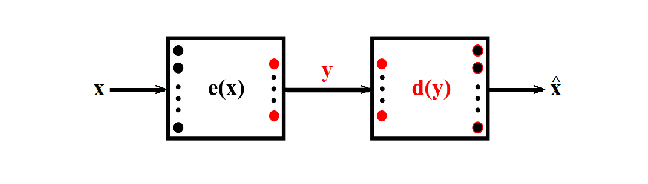

</center>

$\large{\textbf{16.2 Illustrating Autoencoder}}$

In [1]:
from keras.layers import Input, Dense
from keras import models, optimizers
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
N=100;
# Generate random data for the first 4 variables
X = np.random.rand(N, 4)
# Linear relationships
x5 = 2*X[:, 0] + 3*X[:, 1] - X[:, 2] + np.random.normal(0, 0.05, N)
x6 = -X[:, 3] + 0.5*X[:, 2] + 2*X[:, 1] + np.random.normal(0, 0.05, N)
x7 = X[:, 1] - 3*X[:, 2] + np.random.normal(0, 0.05, N)
x8 = 0.7 * x5 + 0.3 * x6 + np.random.normal(0, 0.001, N)
# Non-linear relationships
x9 = np.sin(2 * np.pi * X[:, 0]) + np.cos(np.pi * X[:, 1]) + np.random.normal(0, 0.01, N)
x10 = np.cos(np.pi * x7) + np.random.normal(0, 0.01, N)
# The training data
Xtr = np.column_stack((X, x5, x6, x7, x8, x9, x10))

In [3]:
m = 6
scaler = StandardScaler()
X=scaler.fit_transform(Xtr)  # normalized data

In [ ]:
# Defining and training autoencoder
input = Input(shape=(X.shape[1],))
h=15;
encoded = Dense(h, activation='tanh')(input)
encoded = Dense(m, activation='linear')(encoded)
decoded = Dense(h, activation='tanh')(encoded)
decoded = Dense(X.shape[1], activation='linear')(decoded)
autoencoder = models.Model(input, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=1000)
Xhat=autoencoder.predict(X)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.1813
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0738 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0077 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0050 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9185 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8634
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8294
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7837
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7415
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7262 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7107
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6792
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6435 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6160
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6223  
Epo

In [10]:
from sklearn.metrics import mean_squared_error
mseAE=mean_squared_error(X,Xhat)
mseAE

0.09013225391363916

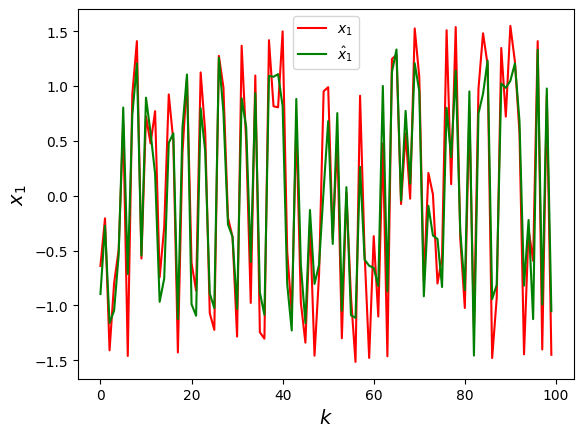

In [11]:
ax = plt.axes()
ax.plot(X[:,0], c = 'red')
plt.plot(Xhat[:,0], c = 'green')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$x_{1}$', fontsize=14)
plt.legend(['$x_{1}$','$\hat{x}_{1}$'])
plt.show()
plt.show()

$\large{\textbf{16.3 Thank you!}}$

In [ ]:
print('Thank you')

Thank you
